In [1]:
from AcousticInstrument import Material, Geometry, StringTuning, NoteSimulation, VibrationSimulation, Acoustic
import matplotlib.pyplot as plt
import cv2
%matplotlib widget

In [2]:
## Dark Object Creation
board_profile = cv2.imread("board.png", cv2.IMREAD_GRAYSCALE)
wall_profile = cv2.imread("wall.png", cv2.IMREAD_GRAYSCALE)
hole_profile = cv2.imread("hole.png", cv2.IMREAD_GRAYSCALE)
bridge_profile = cv2.imread("bridge.png", cv2.IMREAD_GRAYSCALE)
post_profile = cv2.imread("post.png", cv2.IMREAD_GRAYSCALE)

dark_uniform_board_k = 48e6

dark_material = Material(
    front_board_k = dark_uniform_board_k,
    back_board_k = dark_uniform_board_k,
    front_board_k_diag = dark_uniform_board_k,
    back_board_k_diag = dark_uniform_board_k,
    post_k = 12e9,
    bridge_k = 50e6,

    front_board_density = 1800,
    back_board_density = 1800,
    post_m = 0.3,
    bridge_m = 0.1,

    alpha = 1e-9,
    beta = 8e-12
)

dark_design = Geometry(
    board_profile = board_profile,
    wall_profile = wall_profile,
    holes_profile = hole_profile,
    board_thickness= 0.01,
    chamber_height = 0.08,

    bridge_location = bridge_profile,
    post_location = post_profile,
    meter_per_pixel= 6.666e-3
)

dark_tuning = StringTuning(
    string_tension = 770,
    string_mass_per_length = 1.140e-3,
    eff_string_length = 0.45,
    num_node = 200
)

dark_input = NoteSimulation(
    input_type = VibrationSimulation.PLUCK,
    input_fractional_location = 0.2,
    input_amplitude = 0.01,
    simulation_period = 3,
    sampling_rate = 44100,
    acoustic_gain = 1
)

dark_object = Acoustic(dark_design, dark_material, dark_tuning, dark_input)

Finished Creating Front Board
Finished Creating Back Board
Finished Creating Bridge
Finished Creating Post
Finished Creating String
Finished Creating Global System
Finished Calculating Mode 4366/4366
Finished Calculating System Response


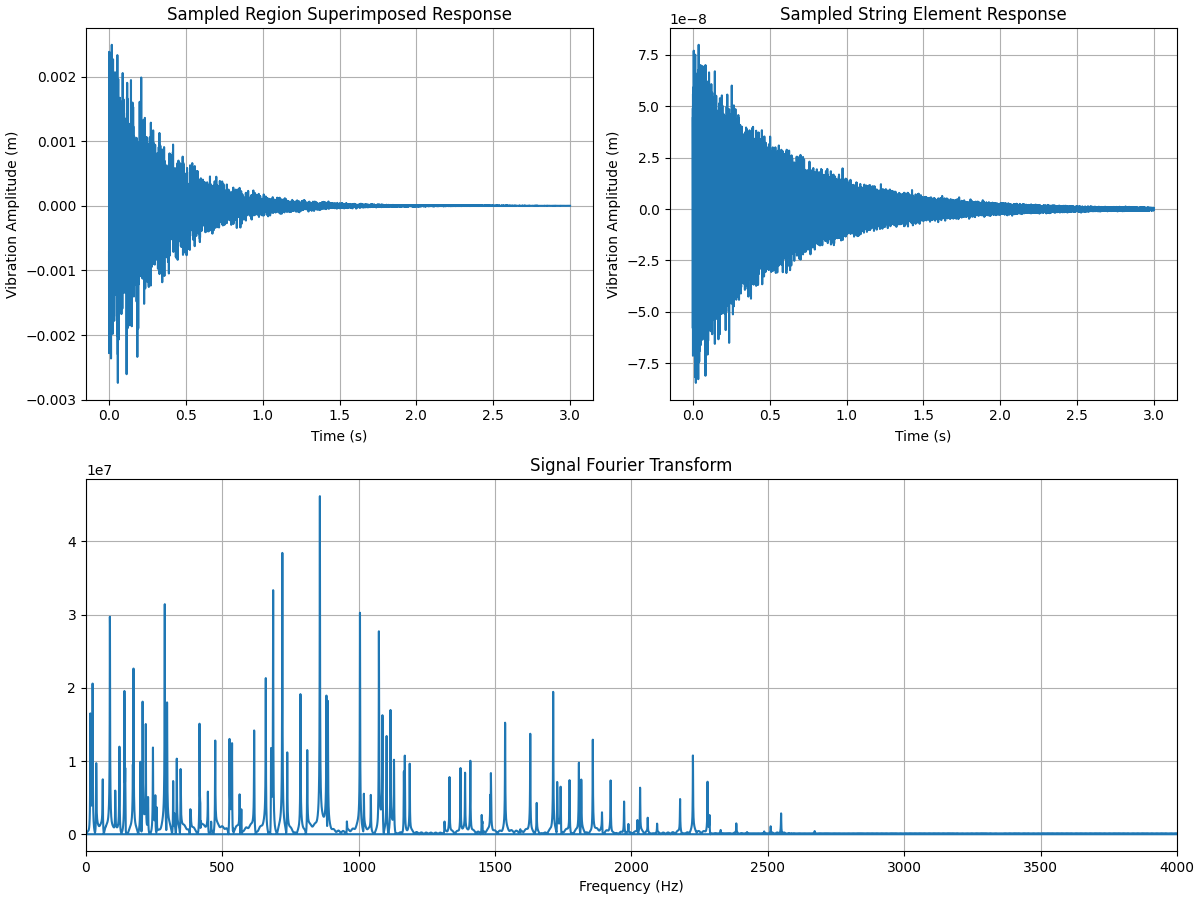

In [3]:
## Dark Signal Post-processing
time_sample_locations = dark_object.system_response.time_sampling_points
signal_time_series = dark_object.system_response.time_series_response
sample_element_offset = dark_object.global_system.string_index_offset + 10 

sample_signal = dark_object.system_response.sampling_region_response
normalized_sample_signal = sample_signal/sample_signal.max() * 30000

sample_element_signal = dark_object.system_response.time_series_response[sample_element_offset,:]
normalized_sample_element_signal = sample_element_signal/sample_element_signal.max() * 30000

from scipy.io.wavfile import write
import numpy as np
sample_rate = dark_input.sampling_rate
write("dark_sound.wav",sample_rate, normalized_sample_signal.astype(np.int16))

from scipy.fft import fft, fftfreq

N = int(dark_input.sampling_rate * dark_input.simulation_period)

yf = fft(normalized_sample_signal.astype(np.int16))
xf = fftfreq(N, 1/dark_input.sampling_rate)

fig = plt.figure(figsize=(12,9))

grid = plt.GridSpec(2,2, figure=fig)

ax1 = fig.add_subplot(grid[0,0])
ax2 = fig.add_subplot(grid[0,1])
ax3 = fig.add_subplot(grid[1,:])

ax1.plot(time_sample_locations, sample_signal)
ax1.set_xlabel("Time (s)")
ax1.set_ylabel("Vibration Amplitude (m)")
ax1.set_title("Sampled Region Superimposed Response")
ax1.grid()

ax2.plot(time_sample_locations, sample_element_signal)
ax2.set_xlabel("Time (s)")
ax2.set_ylabel("Vibration Amplitude (m)")
ax2.set_title("Sampled String Element Response")
ax2.grid()

ax3.plot(xf, np.abs(yf))
ax3.set_xlabel("Frequency (Hz)")
ax3.set_title("Signal Fourier Transform")
ax3.set_xlim(0, 4000)
ax3.grid()
plt.tight_layout(pad=0.4, w_pad=1, h_pad=1)

fig.savefig("Dark.png")

In [4]:
## Bright Object
board_profile = cv2.imread("board.png", cv2.IMREAD_GRAYSCALE)
wall_profile = cv2.imread("wall.png", cv2.IMREAD_GRAYSCALE)
hole_profile = cv2.imread("hole.png", cv2.IMREAD_GRAYSCALE)
bridge_profile = cv2.imread("bridge.png", cv2.IMREAD_GRAYSCALE)
post_profile = cv2.imread("post.png", cv2.IMREAD_GRAYSCALE)

bri_uniform_board_k = 48.3e6

bri_material = Material(
    front_board_k = bri_uniform_board_k,
    back_board_k = bri_uniform_board_k,
    front_board_k_diag = bri_uniform_board_k,
    back_board_k_diag = bri_uniform_board_k,
    post_k = 12e9,
    bridge_k = 50e6,

    front_board_density = 1800,
    back_board_density = 1800,
    post_m = 0.3,
    bridge_m = 0.1,

    alpha = 1e-9,
    beta = 8e-12
)

bri_design = Geometry(
    board_profile = board_profile,
    wall_profile = wall_profile,
    holes_profile = hole_profile,
    board_thickness= 0.01,
    chamber_height = 0.08,

    bridge_location = bridge_profile,
    post_location = post_profile,
    meter_per_pixel= 6.666e-3
)

bri_tuning = StringTuning(
    string_tension = 770,
    string_mass_per_length = 1.140e-3,
    eff_string_length = 0.45,
    num_node = 200
)

bri_input = NoteSimulation(
    input_type = VibrationSimulation.PLUCK,
    input_fractional_location = 0.2,
    input_amplitude = 0.01,
    simulation_period = 3,
    sampling_rate = 44100,
    acoustic_gain = 1
)

bri_object = Acoustic(bri_design, bri_material, bri_tuning, bri_input)

Finished Creating Front Board
Finished Creating Back Board
Finished Creating Bridge
Finished Creating Post
Finished Creating String
Finished Creating Global System
Finished Calculating Mode 4366/4366
Finished Calculating System Response


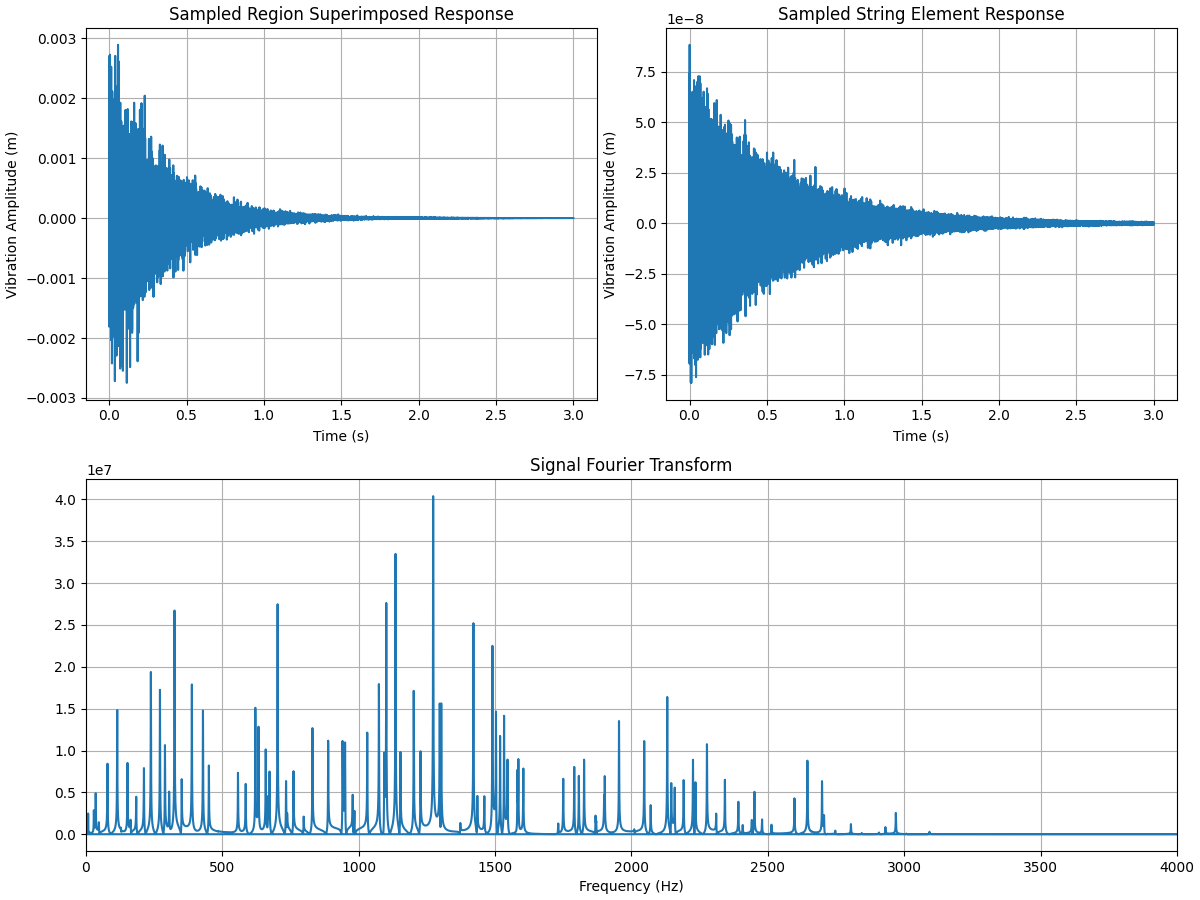

In [7]:
## Bright Signal Post-processing
time_sample_locations = bri_object.system_response.time_sampling_points
signal_time_series = bri_object.system_response.time_series_response
sample_element_offset = bri_object.global_system.string_index_offset + 100 

sample_signal = bri_object.system_response.sampling_region_response
normalized_sample_signal = sample_signal/sample_signal.max() * 30000

sample_element_signal = bri_object.system_response.time_series_response[sample_element_offset,:]
normalized_sample_element_signal = sample_element_signal/sample_element_signal.max() * 30000

from scipy.io.wavfile import write
import numpy as np
sample_rate = bri_input.sampling_rate
write("bright_sound.wav",sample_rate, normalized_sample_signal.astype(np.int16))

from scipy.fft import fft, fftfreq

N = int(bri_input.sampling_rate * bri_input.simulation_period)

yf = fft(normalized_sample_signal.astype(np.int16))
xf = fftfreq(N, 1/bri_input.sampling_rate)

fig = plt.figure(figsize=(12,9))

grid = plt.GridSpec(2,2, figure=fig)

ax1 = fig.add_subplot(grid[0,0])
ax2 = fig.add_subplot(grid[0,1])
ax3 = fig.add_subplot(grid[1,:])

ax1.plot(time_sample_locations, sample_signal)
ax1.set_xlabel("Time (s)")
ax1.set_ylabel("Vibration Amplitude (m)")
ax1.set_title("Sampled Region Superimposed Response")
ax1.grid()

ax2.plot(time_sample_locations, sample_element_signal)
ax2.set_xlabel("Time (s)")
ax2.set_ylabel("Vibration Amplitude (m)")
ax2.set_title("Sampled String Element Response")
ax2.grid()

ax3.plot(xf, np.abs(yf))
ax3.set_xlabel("Frequency (Hz)")
ax3.set_title("Signal Fourier Transform")
ax3.set_xlim(0, 4000)
ax3.grid()
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

fig.savefig("Bright.png")